### Tutorial: https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [1]:
# The code was removed by DSX for sharing.

In [50]:
import pickle
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV

import re
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split

from sklearn import metrics

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv(project.get_file('labeled_clustered.csv'),encoding='latin-1')

In [5]:
df['label'] = df.label.str.lower()

In [6]:
df['label'].value_counts()

random      1093
ml           330
github       237
news         221
dev          146
science      101
tech          79
thought       64
biz-news      56
business      50
crypto        33
Name: label, dtype: int64

In [16]:
from pandas.io.json import json_normalize
import json

# with open(project.get_file('clustered_stories.json').read()) as json_data:
#     d = json.load(json_data)
    
# stories_df = json_normalize(d)

In [37]:
# The code was removed by DSX for sharing.

In [38]:
stories_df = pd.read_json(body, orient='records')
stories_df.head()

,by,clust_label,clust_label_agg,descendants,id,kids,pain_perdu,score,text,text_length,time,title,type,url
0,pain_perdu,2,7,77,16936533,"[16937090, 16936857, 16936689, 16936691, 16937...",NaN,141,© Copyright 2000 - 2016 Fox Television Station...,6154,1524781744,DNA linked to Golden State Killer arrest came ...,story,http://www.ktvu.com/news/dna-linked-to-golden-...
1,rezashirazian,3,0,57,16935270,"[16936257, 16935515, 16936338, 16937273, 16935...",NaN,234,\n\n\n\n var postLoadFunctions = {}...,28245,1524773832,Square to buy Weebly for $365M,story,https://www.cnbc.com/2018/04/26/square-to-buy-...
2,arctux,0,1,109,16933736,"[16935012, 16935247, 16935094, 16934190, 16937...",NaN,402,"by Matthew Hodgson | Apr 26, 2018 | General, ...",4477,1524762980,Matrix and Riot Confirmed as the Basis for Fra...,story,https://matrix.org/blog/2018/04/26/matrix-and-...
3,ingve,2,2,102,16933265,"[16933598, 16933544, 16934620, 16933861, 16934...",NaN,462,"Uncovering the best of the web, while pointing...",9866,1524759583,Magnasanti: Large and Terrifying SimCity (2010),story,https://rumorsontheinternets.org/2010/10/14/ma...
4,velmu,5,3,20,16934656,"[16935702, 16936638, 16937333, 16935952, 16937...",NaN,92,\n \n\tCyber security has evolved into a key i...,10789,1524769885,"SEC Penalizes Yahoo $35M for Massive, Undisclo...",story,https://www.jdsupra.com/legalnews/sec-penalize...


In [39]:
labeled = df.dropna()
keep_cols = ['id','label']

In [40]:
labeled = labeled[keep_cols]

In [41]:
combined = labeled.merge(stories_df,on='id')

In [42]:
combined.head(2)

,id,label,by,clust_label,clust_label_agg,descendants,kids,pain_perdu,score,text,text_length,time,title,type,url
0,16989464,biz-news,mgdo,3,1,1,"[16989924, 16989502]",NaN,38,When you set a password for your Twitter accou...,1539,1525378300,Twitter – Keeping your account secure,story,https://blog.twitter.com/official/en_us/topics...
1,17012651,biz-news,rbanffy,7,4,0,None,NaN,1,"20 years ago today, Steve Jobs introduced the ...",5119,1525700941,Steve Jobs introduced the original iMac 20 yea...,story,http://bgr.com/2018/05/06/imac-history-steve-j...


In [44]:
#combined['label_id'] = combined['label'].factorize()[0]
encoder = LabelEncoder()
encoder.fit(combined['label'])
np.save('topic_classes.npy', encoder.classes_)

In [45]:
encoder.classes_

array(['biz-news', 'business', 'crypto', 'dev', 'github', 'ml', 'news',
       'random', 'science', 'tech', 'thought'], dtype=object)

In [51]:
project.save_data(data=pickle.dumps(encoder.classes_),file_name='topic_classes.pkl',overwrite=True)

{'asset_id': 'd08fb0e1-97fc-4499-8700-634e2c78ccb1',
 'bucket_name': 'pyconproject-donotdelete-pr-hvlammk95c1rrk',
 'file_name': 'topic_classes.pkl',
 'message': 'File topic_classes.pkl has been written successfully to the associated OS'}

In [52]:
classes = pickle.load(project.get_file('topic_classes.pkl'))

In [53]:
classes

array(['biz-news', 'business', 'crypto', 'dev', 'github', 'ml', 'news',
       'random', 'science', 'tech', 'thought'], dtype=object)

In [54]:
combined['label_id'] = encoder.transform(combined['label'])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(combined.text, combined.label_id, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [56]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(combined.text).toarray()
labels = combined.label_id


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


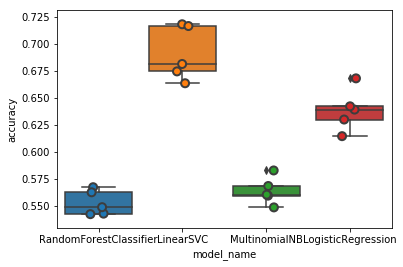

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [58]:
from sklearn.pipeline import Pipeline


tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

svm= LinearSVC()

svm_pipe = Pipeline([('tfidf', tfidf), ('svm', svm)])

In [59]:
svm_model = svm_pipe.fit(combined.text, combined.label_id)

In [ ]:
from sklearn.externals import joblib
joblib.dump(svm_model, 'svm.pkl') 
